Exercises
---
- [1.1](#1.1)
- [1.2](#1.2)
- [1.3](#1.3)
- [2.1](#2.1)
- [2.2](#2.2)
- [3.1](#3.1)
- [3.2](#3.2)

1.1
===

In [1]:
import pandas as pd

In [2]:
#1
df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

df = df.loc['2012':]

df.head()

,Consumption,Wind,Solar
Date,,,
2012-01-01,948.128,227.465,6.587
2012-01-02,1269.581,207.327,6.574
2012-01-03,1334.745,473.468,24.679
2012-01-04,1347.136,499.804,14.681
2012-01-05,1376.658,523.851,5.071


In [3]:
#2
df['Renewable'] = df['Wind'] + df['Solar']

df.head()

,Consumption,Wind,Solar,Renewable
Date,,,,
2012-01-01,948.128,227.465,6.587,234.052
2012-01-02,1269.581,207.327,6.574,213.901
2012-01-03,1334.745,473.468,24.679,498.147
2012-01-04,1347.136,499.804,14.681,514.485
2012-01-05,1376.658,523.851,5.071,528.922


In [4]:
#3
a = df.loc['2014-09']['Renewable'].sum()
b = df.loc['2014-09', 'Consumption'].sum()#sintassi alternativa

print(f'On September 2014, the ratio between renewable energy production and total consumption is {a/b:.2f}')

On September 2014, the ratio between renewable energy production and total consumption is 0.13


In [5]:
#4
df['Weekday'] = df.index.day_name()
df.head()

,Consumption,Wind,Solar,Renewable,Weekday
Date,,,,,
2012-01-01,948.128,227.465,6.587,234.052,Sunday
2012-01-02,1269.581,207.327,6.574,213.901,Monday
2012-01-03,1334.745,473.468,24.679,498.147,Tuesday
2012-01-04,1347.136,499.804,14.681,514.485,Wednesday
2012-01-05,1376.658,523.851,5.071,528.922,Thursday


In [6]:
#5
df_sunday_wind = df[df['Weekday'] == 'Sunday']['Wind']

df_sunday_wind.head()

Date
2012-01-01    227.465
2012-01-08    220.851
2012-01-15     34.468
2012-01-22    418.173
2012-01-29     78.807
Name: Wind, dtype: float64

In [7]:
#6
x = df_sunday_wind['2017-01':'2017-03'].mean()

print(f'Between January and March 2017, the Sunday production of wind energy is {x:.2f}')

Between January and March 2017, the Sunday production of wind energy is 276.96


1.2
===

In [8]:
import seaborn as sns

In [9]:
sns.set()

In [10]:
df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')
df.head()

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN
2006-01-04,1457.217,NaN,NaN
2006-01-05,1477.131,NaN,NaN


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

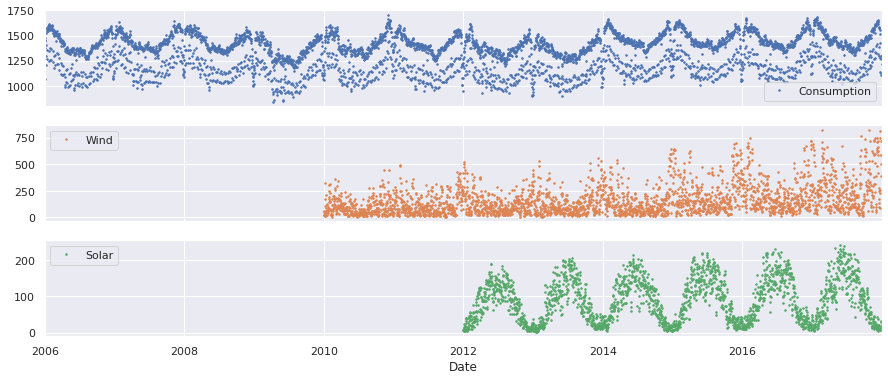

In [11]:
subplots = df.plot(figsize=(15, 6),
                   marker='.',
                   markersize=3,
                   linestyle='',
                   subplots=True)

subplots

<AxesSubplot:xlabel='Date'>

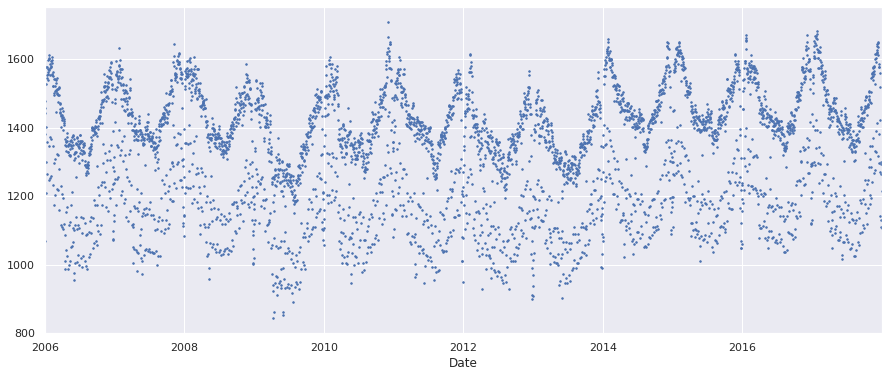

In [12]:
df['Consumption'].plot(figsize=(15, 6),
                       marker='.',
                       markersize=3,
                       linestyle='')

<AxesSubplot:xlabel='Date'>

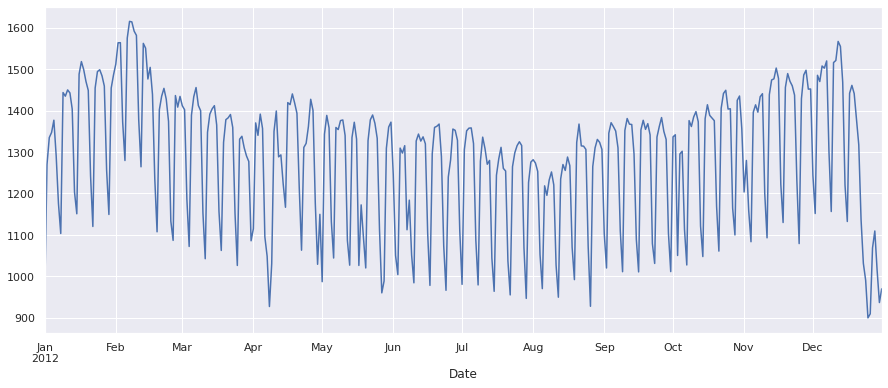

In [13]:
df['Consumption']['2012'].plot(figsize=(15, 6), linestyle='-')

<AxesSubplot:xlabel='Date'>

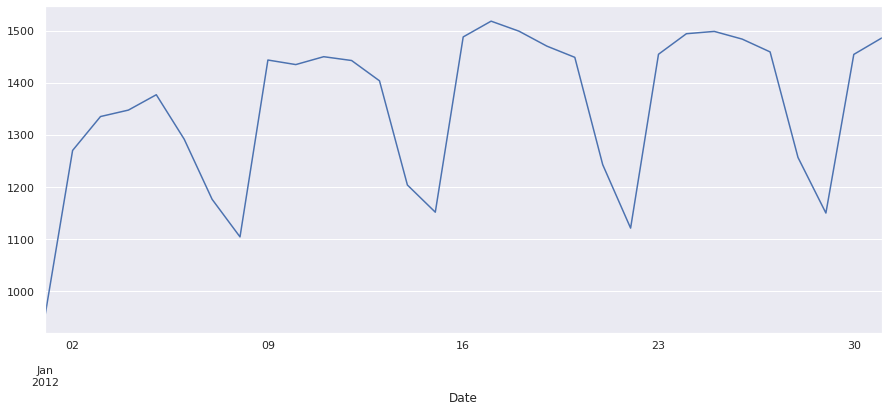

In [14]:
df['Consumption']['2012-01'].plot(figsize=(15, 6), linestyle='-')

<AxesSubplot:xlabel='Date'>

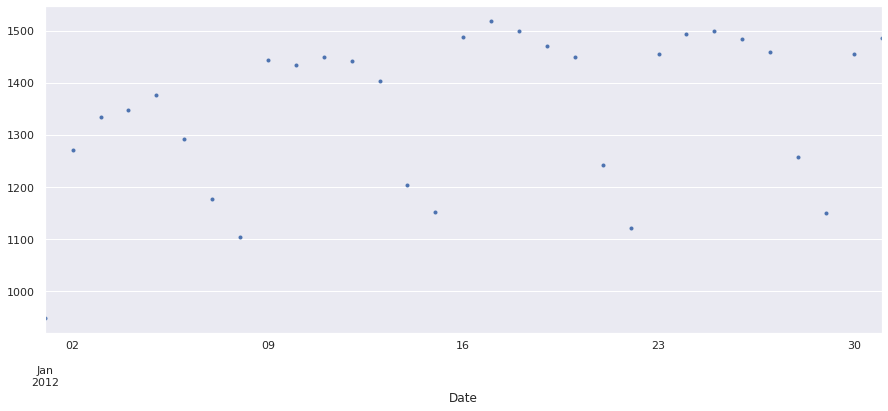

In [15]:
df['Consumption']['2012-01'].plot(figsize=(15, 6),
                                  marker='.',
                                  linestyle='')

1.3
===

In [16]:
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')
df.head()

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN
2006-01-04,1457.217,NaN,NaN
2006-01-05,1477.131,NaN,NaN


In [18]:
df['Weekday'] = df.index.day_name()

df.head()

,Consumption,Wind,Solar,Weekday
Date,,,,
2006-01-01,1069.184,NaN,NaN,Sunday
2006-01-02,1380.521,NaN,NaN,Monday
2006-01-03,1442.533,NaN,NaN,Tuesday
2006-01-04,1457.217,NaN,NaN,Wednesday
2006-01-05,1477.131,NaN,NaN,Thursday


<AxesSubplot:title={'center':'Average weekly electrical power consumption (GWh)'}, xlabel='Weekday'>

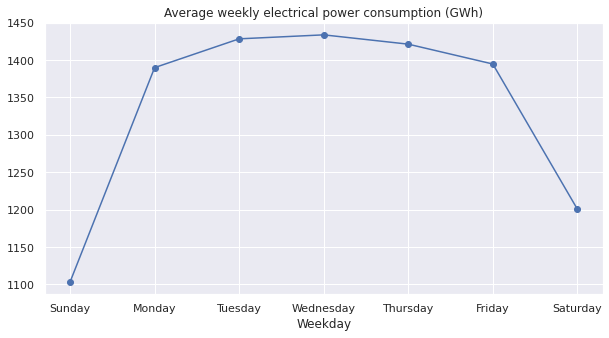

In [19]:
df.groupby('Weekday', sort=False)['Consumption'].mean().plot(figsize=(10,5),
                                                             marker='o',
                                                             title='Average weekly electrical power consumption (GWh)')

<AxesSubplot:xlabel='Weekday', ylabel='Consumption'>

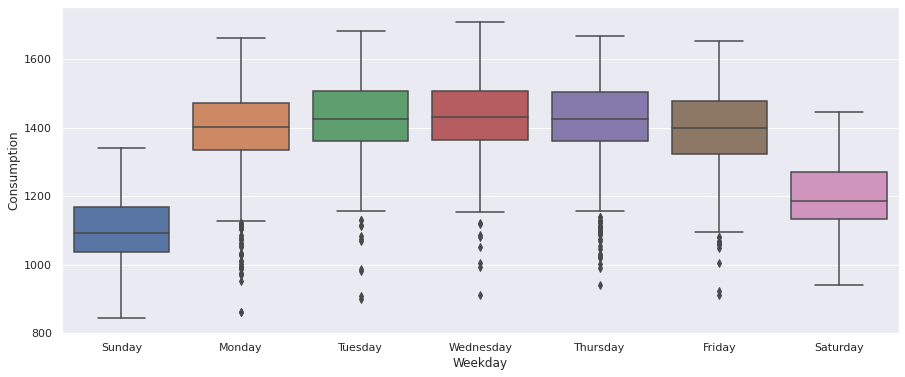

In [20]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Weekday',
            y='Consumption',
            data=df)

<AxesSubplot:xlabel='Weekday', ylabel='Consumption'>

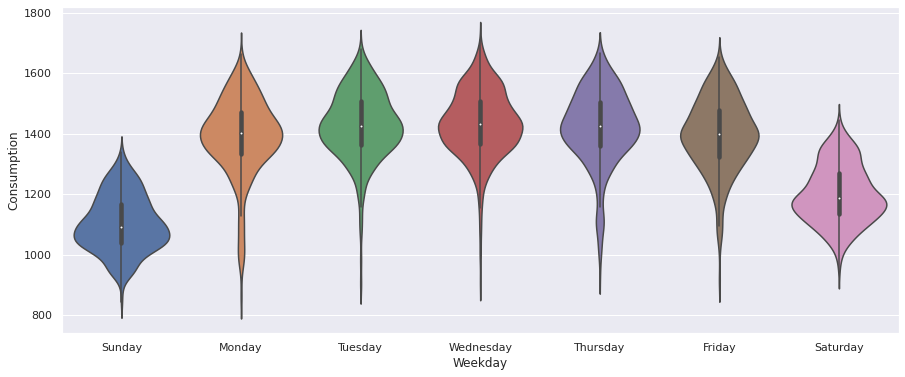

In [21]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='Weekday',
               y='Consumption',
               data=df)

---

2.1
===

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
sns.set()

In [24]:
df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

df = df.fillna(0)

df['Renewable'] = df['Solar'] + df['Wind']

df.head()

,Consumption,Wind,Solar,Renewable
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0


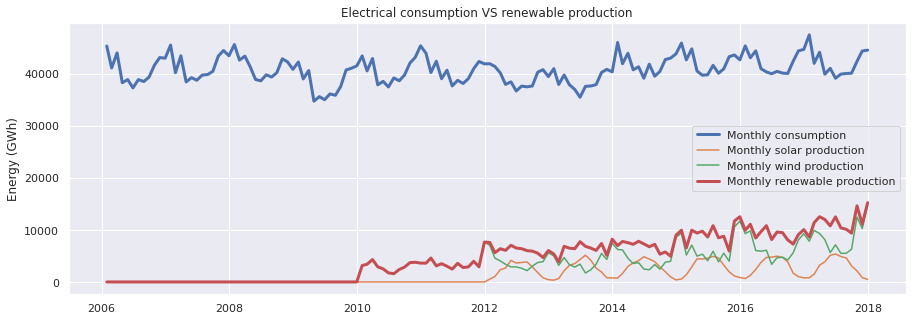

In [25]:
plt.figure(figsize=(15,5))

plt.plot(df['Consumption'].resample('M').sum(),
         linewidth=3,
         label='Monthly consumption')

plt.plot(df['Solar'].resample('M').sum(),
         label='Monthly solar production')

plt.plot(df['Wind'].resample('M').sum(),
         label='Monthly wind production')

plt.plot(df['Renewable'].resample('M').sum(),
         linewidth=3,
         label='Monthly renewable production')

plt.ylabel('Energy (GWh)')
plt.title('Electrical consumption VS renewable production')
plt.legend()

In [26]:
df_yearly_sum = df.resample('Y').sum()

df_yearly_sum

,Consumption,Wind,Solar,Renewable
Date,,,,
2006-12-31,489068.53600,0.000,0.000,0.000
2007-12-31,496631.84700,0.000,0.000,0.000
2008-12-31,495570.87600,0.000,0.000,0.000
2009-12-31,459737.42800,0.000,0.000,0.000
2010-12-31,488588.70000,35911.777,0.000,35911.777
2011-12-31,484814.08600,44032.951,0.000,44032.951
2012-12-31,469574.75400,45862.667,27887.332,73749.999
2013-12-31,463336.85300,47197.832,29559.780,76757.612
2014-12-31,504164.82100,51107.672,32498.307,83605.979


In [27]:
df.loc['2006'].sum()

Consumption    489068.536
Wind                0.000
Solar               0.000
Renewable           0.000
dtype: float64

In [28]:
df_yearly_sum['Renewable/Consumption'] = df_yearly_sum['Renewable'] / df_yearly_sum['Consumption']
df_yearly_sum

,Consumption,Wind,Solar,Renewable,Renewable/Consumption
Date,,,,,
2006-12-31,489068.53600,0.000,0.000,0.000,0.000000
2007-12-31,496631.84700,0.000,0.000,0.000,0.000000
2008-12-31,495570.87600,0.000,0.000,0.000,0.000000
2009-12-31,459737.42800,0.000,0.000,0.000,0.000000
2010-12-31,488588.70000,35911.777,0.000,35911.777,0.073501
2011-12-31,484814.08600,44032.951,0.000,44032.951,0.090824
2012-12-31,469574.75400,45862.667,27887.332,73749.999,0.157057
2013-12-31,463336.85300,47197.832,29559.780,76757.612,0.165663
2014-12-31,504164.82100,51107.672,32498.307,83605.979,0.165831


In [29]:
df_yearly_sum['Renewable/Consumption'] = (df_yearly_sum['Renewable/Consumption']*100).round(1)
df_yearly_sum

,Consumption,Wind,Solar,Renewable,Renewable/Consumption
Date,,,,,
2006-12-31,489068.53600,0.000,0.000,0.000,0.0
2007-12-31,496631.84700,0.000,0.000,0.000,0.0
2008-12-31,495570.87600,0.000,0.000,0.000,0.0
2009-12-31,459737.42800,0.000,0.000,0.000,0.0
2010-12-31,488588.70000,35911.777,0.000,35911.777,7.4
2011-12-31,484814.08600,44032.951,0.000,44032.951,9.1
2012-12-31,469574.75400,45862.667,27887.332,73749.999,15.7
2013-12-31,463336.85300,47197.832,29559.780,76757.612,16.6
2014-12-31,504164.82100,51107.672,32498.307,83605.979,16.6


Text(0, 0.5, 'Energy (GWh)')

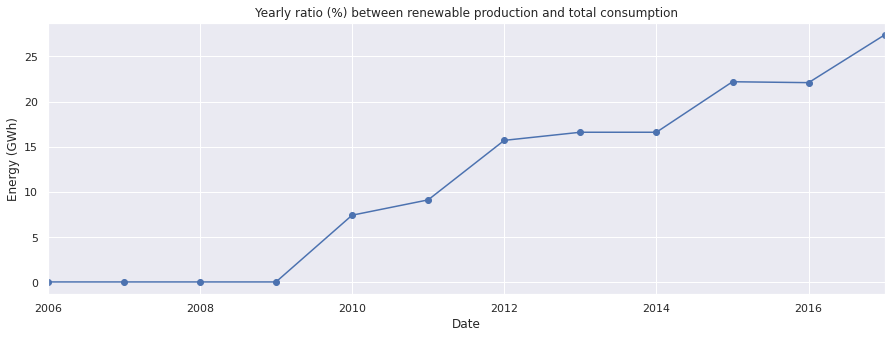

In [30]:
df_yearly_sum['Renewable/Consumption'].plot(figsize=(15, 5),
                                            marker='o',
                                            title='Yearly ratio (%) between renewable production and total consumption')
plt.ylabel('Energy (GWh)')

2.2
---

In [31]:
plt.rcParams['figure.figsize'] = (15,5)

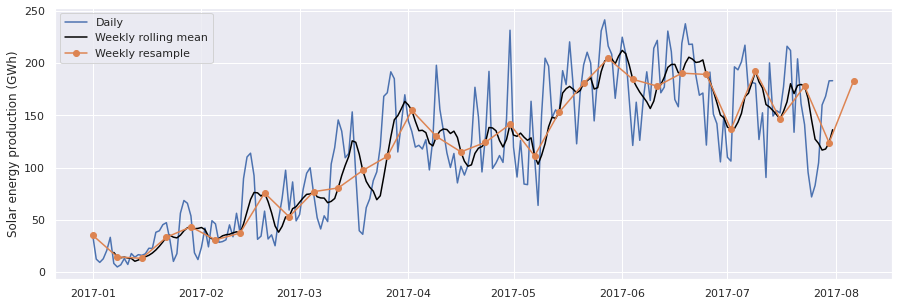

In [32]:
plt.plot(df['Solar']['2017-01':'2017-07'],
         label='Daily')

plt.plot(df['Solar']['2017-01':'2017-07'].rolling(7).mean(),
         label='Weekly rolling mean',
         color='black')

plt.plot(df['Solar']['2017-01':'2017-07'].resample('W').mean(),
         marker='o',
         label='Weekly resample')

plt.ylabel('Solar energy production (GWh)')
plt.legend()

3.1
---

In [33]:
df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

df['Renewable'] = df['Solar'] + df['Wind']

df.head()

,Consumption,Wind,Solar,Renewable
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


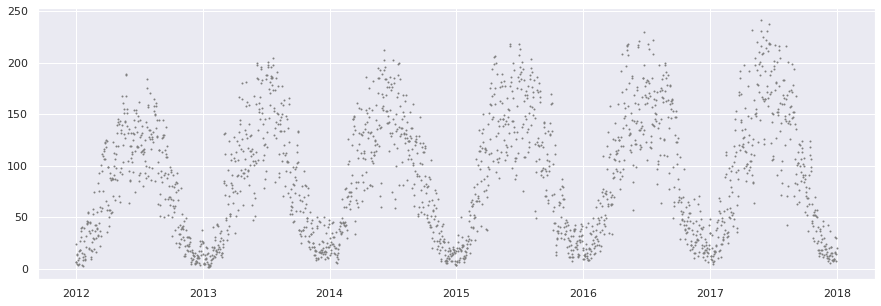

In [34]:
plt.plot(df['Solar']['2012':],
         marker='.',
         markersize=2,
         linestyle='',
         label='Daily',
         color='gray')

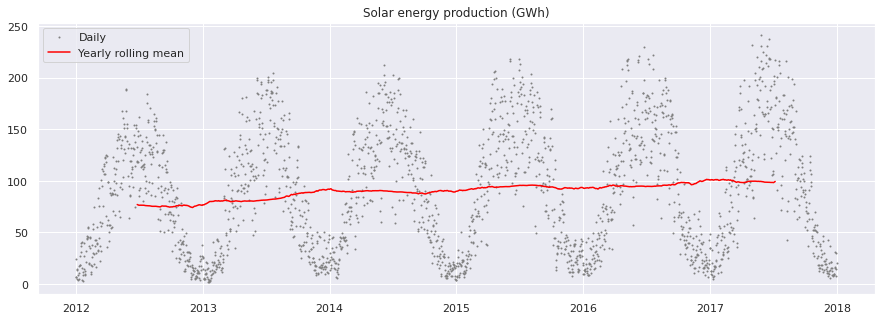

In [35]:
plt.plot(df['Solar']['2012':],
         marker='.',
         markersize=2,
         linestyle='',
         label='Daily',
         color='gray')

plt.plot(df['Solar']['2012':].rolling(365, center=True, min_periods=360).mean(),
         label='Yearly rolling mean',
         color='red')

plt.title('Solar energy production (GWh)')
plt.legend()

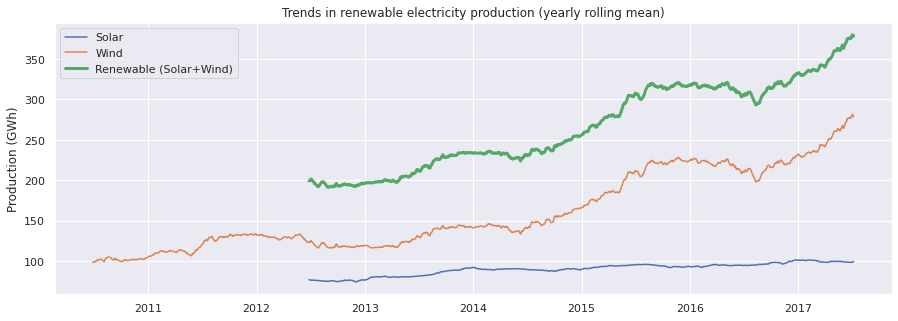

In [36]:
plt.plot(df['Solar'].rolling(365, center=True, min_periods=360).mean(),
         label='Solar')

plt.plot(df['Wind'].rolling(365, center=True, min_periods=360).mean(),
         label='Wind')

plt.plot(df['Renewable'].rolling(365, center=True, min_periods=360).mean(),
         label='Renewable (Solar+Wind)',
         linewidth=3)

plt.title('Trends in renewable electricity production (yearly rolling mean)')
plt.ylabel('Production (GWh)')
plt.legend()

3.2
---

In [37]:
from fbprophet import Prophet

In [38]:
df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

df.head()

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN
2006-01-04,1457.217,NaN,NaN
2006-01-05,1477.131,NaN,NaN


In [39]:
df_train = df[['Solar']]['2012':'2016']
df_test = df[['Solar']].loc['2017']

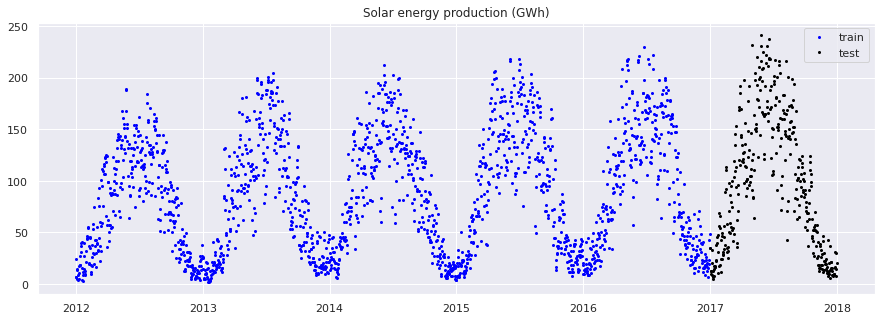

In [40]:
plt.figure(figsize=(15, 5))

plt.plot(df_train,
         marker='.',
         markersize=4,
         linestyle='',
         label='train',
         color='blue')

plt.plot(df_test,
         marker='.',
         markersize=4,
         linestyle='',
         label='test',
         color='black')

plt.title('Solar energy production (GWh)')
plt.legend()

In [41]:
df_train_prophet = df_train.reset_index()
df_train_prophet.columns = ['ds', 'y']
df_train_prophet

,ds,y
0,2012-01-01,6.587
1,2012-01-02,6.574
2,2012-01-03,24.679
3,2012-01-04,14.681
4,2012-01-05,5.071
...,...,...
1822,2016-12-27,23.448
1823,2016-12-28,19.450
1824,2016-12-29,42.910
1825,2016-12-30,48.546


In [42]:
model = Prophet(weekly_seasonality=False)
model.fit(df_train_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future = model.make_future_dataframe(periods=365, include_history=False)
test_predictions = model.predict(future)
df_test['Prediction'] = test_predictions['yhat'].values

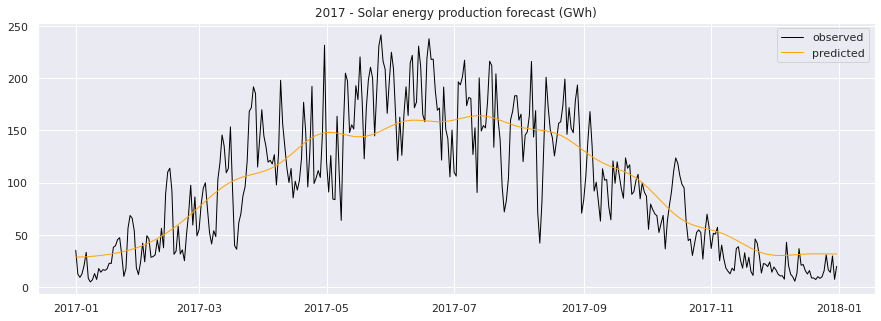

In [44]:
plt.figure(figsize=(15, 5))

plt.plot(df_test['Solar'],
         linestyle='-',
         color='black',
         linewidth=1,
         label='observed')

plt.plot(df_test['Prediction'],
         linestyle='-',
         linewidth=1,
         color='orange',
         label='predicted')

plt.title('2017 - Solar energy production forecast (GWh)')
plt.legend()

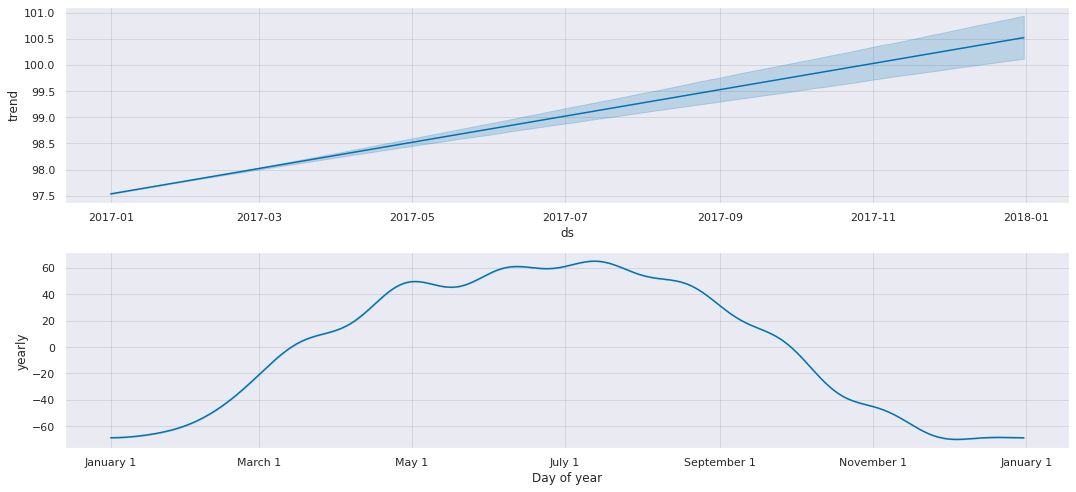

In [45]:
res = model.plot_components(test_predictions, figsize=(15, 7))

---

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by OVHCloud.
</footer>